In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '~/caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = './project/cnn-speech-denoising/models/model0/noisy_to_clean.20.prototxt'
PRETRAINED = './project/cnn-speech-denoising/models/model0/snapshots/noisy_to_clean.20_iter_200.caffemodel'

In [8]:
# train is 0, test is 1

In [35]:
caffe.set_mode_cpu()
net = caffe.Net(MODEL_FILE, PRETRAINED, 0)
output = net.forward()

In [36]:
print net.blobs.keys()

['data', 'label', 'flat', 'conv1', 'relu1', 'conv2', 'relu2', 'conv3', 'fc', 'l2_error']


flat (50, 260, 1, 1)
fc (50, 260, 1, 1)
mse 4.66775


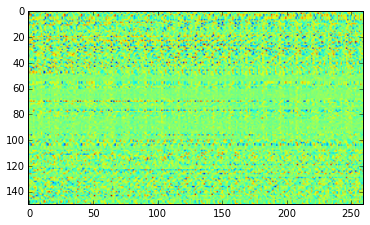

In [38]:
from pylab import imshow

flat = net.blobs['flat'].data
print 'flat', flat.shape
expect = flat[:,:,0,0]

fc = net.blobs['fc'].data
print 'fc', fc.shape
got = fc[:,:,0,0]

diff = got - expect
print 'mse', np.mean(np.sum(diff**2, axis=1))

imshow(np.concatenate([expect, got, diff], axis=0))